In [1]:
# %pip install blimpy
# %pip install setigen
# %pip install hdf5plugin
# %pip install h5py
# %pip install h5py
# %pip install torchvision
# %pip install transformers
# %pip install torch
# %pip install ultralytics

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import blimpy as bl
#from ultralytics import YOLO
import time
import os
import random
import psutil
%matplotlib inline

In [3]:
df = pd.read_csv('/home/cgchoza/galaxies/complete_cadences_catalog.csv')
df

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
0,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
1,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
2,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
3,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
4,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
...,...,...,...,...,...,...,...,...
36553,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36554,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36555,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
36556,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36


In [4]:
high_res_path = df['.h5 path'].iloc[-1]
mid_res_path = high_res_path.replace('0000.h5', '0002.h5')
print(high_res_path)
print(mid_res_path)

/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc16_guppi_59902_24005_HIP50744_0057.rawspec.0000.h5
/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc16_guppi_59902_24005_HIP50744_0057.rawspec.0002.h5


In [5]:
# fb_mid = bl.Waterfall(mid_res_path)
# mid_data = fb_mid.data # shape: (279; 1; 65,536)
# plt.imshow(10*np.log10(mid_data).squeeze(), aspect='auto')
# #plt.xlim(1125.13, 1125.14)
# plt.show()

In [6]:
# fb_high = bl.Waterfall(high_res_path)
# high_data = fb_high.data # shape: (16; 1; 67,108,864)
# plt.imshow(10*np.log10(high_data).squeeze(), aspect='auto')
# #plt.xlim(1125.13, 1125.14)
# plt.show()

In [7]:
df['.h5 path'] = df['.h5 path'].str.replace('0000.h5', '0002.h5', regex=False)
df = df.drop_duplicates(subset='.h5 path', keep='first').reset_index(drop=True)
df

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
0,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
1,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
2,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
3,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
4,DDO210,AGBT18A_999_103,L,24777,2251,/datag/pipeline/AGBT18A_999_103/collate/splice...,/home/obs/turboseti/AGBT18A_999_103/collate/sp...,2018-07-07 08:49:26
...,...,...,...,...,...,...,...,...
30309,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
30310,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
30311,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
30312,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36


In [8]:
df = df[~df['.h5 path'].str.contains('spliced')].reset_index(drop=True)
df

,Target,Session,Band,Cadence ID,Frequency,.h5 path,.dat path,Time
0,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
1,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
2,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
3,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
4,AND_XIV,AGBT18B_999_07,S,30225,3151,/datag/pipeline/AGBT18B_999_07/blc40_blp00/blc...,/home/obs/turboseti/AGBT18B_999_07/blc40_blp00...,2018-08-18 08:41:37
...,...,...,...,...,...,...,...,...
29341,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
29342,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
29343,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36
29344,NGC3226,AGBT22B_999_25,L,411390,1126,/datag/pipeline/AGBT22B_999_25/blc16_blp06/blc...,/home/obs/turboseti/AGBT22B_999_25/blc16_blp06...,2022-11-19 06:13:36


In [ ]:
df = df.drop(index = 17546)
import pandas as pd
import blimpy as bl
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm

def scan_file_for_band(
    h5_path: str,
    band: str,
    fmin: float,
    fmax: float,
    default_nfpc: int = 1024
):
    """
    Open one .h5, read header, return list of dicts for all channels
    whose freq range lies in [fmin, fmax].
    """
    records = []
    fb = bl.Waterfall(h5_path, load_data=False)
    hdr = fb.header

    # skip if not the right band
    # you could also pass row['Band'] in here if you like
    # if row['Band'] != band: return []

    fch1   = hdr['fch1']
    foff   = hdr['foff']
    nchans = hdr.get('nchans')
    nfpc   = hdr.get('nfpc', default_nfpc)
    n_coarse = nchans // nfpc

    for ch in range(n_coarse):
        f0 = ch * nfpc
        f1 = (ch+1) * nfpc
        f_start = fch1 + f0 * foff
        f_stop  = fch1 + (f1-1) * foff
        if (f_start <= fmax) and (f_stop >= fmin):
            records.append({
                '.h5 path': h5_path,
                'channel':    ch,
                'Band':       band,
                'f_start':    f_start,
                'f_stop':     f_stop
            })

    return records

def parallel_filter_df(
    df: pd.DataFrame,
    band: str = "L",
    fmin: float = 1500,
    fmax: float = 1650,
    max_workers: int = 8
) -> pd.DataFrame:
    # restrict to Band==L first to cut the task list down
    df_band = df[df['Band'] == band]
    paths   = df_band[".h5 path"].unique().tolist()

    all_records = []
    with ProcessPoolExecutor(max_workers=max_workers) as exe:
        futures = {
            exe.submit(scan_file_for_band, p, band, fmin, fmax): p
            for p in paths
        }
        for fut in tqdm(as_completed(futures), total=len(futures), ascii=True,
                        desc=f"Scanning {band}-band files"):
            try:
                recs = fut.result()
                all_records.extend(recs)
            except Exception as e:
                h5 = futures[fut]
                print(f"Error on {h5}: {e!r}")

    return pd.DataFrame.from_records(all_records)

# Usage:
df = parallel_filter_df(df, band="L", fmin=1500, fmax=1650, max_workers=2)
print(f"Kept {len(df)} channel entries in L-band 1500-1650 MHz")
# # 1) sample, keeping the original index labels
# df_old = df.sample(n=1000, random_state=42)
# # 2) drop those exact rows from df
# df = df.drop(index=df_old.index).reset_index(drop=True)
# # 4) finally, sample 1,000 more from the remainder
df = df.sample(n=1000, random_state=42).reset_index(drop=True)

In [ ]:
# import cv2

# img = cv2.imread("/datax/scratch/jliang/dataset/images/train/img_31693.jpg")
# height, width, channels = img.shape

# print(f"Width: {width}, Height: {height}, Channels: {channels}")


Width: 781, Height: 524, Channels: 3


In [10]:
# fb_mid.info() # shape: (279; 1; 65,536)

In [11]:
# fb_high.info() # shape: (16; 1; 67,108,864)

In [12]:
def overlaps_existing(x_center, width, used_intervals):
    x_min = x_center - width / 2
    x_max = x_center + width / 2
    for (xmin_used, xmax_used) in used_intervals:
        if not (x_max <= xmin_used or x_min >= xmax_used):  # overlap detected
            return True
    return False

In [ ]:
# small_df = df.sample(n=1000, random_state=42).reset_index(drop=True)

In [ ]:
def build_tasks(df):
    """
    Build a flat list of (h5_path, channel_idx) from your DataFrame,
    skipping any channels that fall into known notch filter frequency ranges.
    """
    GBT_NOTCH_FILTERS = {
        "L": [(1200, 1340)],
        "S": [(2300, 2360)],
    }

    tasks = []

    for _, row in df.iterrows():
        h5 = row[".h5 path"]
        band = row["Band"]  # e.g., 'L', 'S', etc.
        fb = bl.Waterfall(h5, load_data=False)
        nfreq = fb.header.get("nchans")
        nfpc = fb.header.get("nfpc", 1024)
        fch1 = fb.header["fch1"]
        foff = fb.header["foff"]
        n_coarse = nfreq // nfpc

        for ch in range(n_coarse):
            f0 = fch1 + ch * nfpc * foff
            f1 = fch1 + (ch + 1) * nfpc * foff
            f_min, f_max = sorted([f0, f1])

            # Check against notch filter exclusion ranges
            skip = False
            if band in GBT_NOTCH_FILTERS:
                for lo, hi in GBT_NOTCH_FILTERS[band]:
                    if lo <= f_min <= hi or lo <= f_max <= hi:
                        skip = True
                        break
            if not skip:
                tasks.append((h5, ch))

    return tasks


def split_tasks(tasks, train_frac=0.8, seed=42):
    """
    Shuffle & split the flat task list into train vs. val sets.
    Returns two sets of (h5_path, channel_idx).
    """
    random.seed(seed)
    shuffled = tasks.copy()
    random.shuffle(shuffled)
    cut = int(train_frac * len(shuffled))
    train = set(shuffled[:cut])
    val   = set(shuffled[cut:])
    return train, val

In [ ]:
import pandas as pd
from pathlib import Path
import numpy as np
from PIL import Image, ImageDraw
import blimpy as bl
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm

DAT_COLS = [
    'Top_Hit_#', 'Drift_Rate', 'SNR', 'Uncorrected_Frequency',
    'Corrected_Frequency', 'Index', 'freq_start', 'freq_end',
    'SEFD', 'SEFD_freq', 'Coarse_Channel_Number', 'Full_number_of_hits'
]
OUTPUT_DIR = Path("/datax/scratch/jliang/highres_hits")
PAD_WIDTH = 4  # zero-padding for channel numbers
NUM_WORKERS = 4

# Build (h5, channel) pairs using user build_tasks
pair_tasks = build_tasks(df)
# Build mapping from h5 to its dat path
dat_map = {row[".h5 path"]: row[".dat path"] for _, row in df.iterrows()}
# Expand to (h5, dat, channel) triplets for processing
channel_tasks = [(h5, dat_map[h5], ch) for (h5, ch) in pair_tasks]


def save_coarse_for_hits(h5_path, dat_path, ch, out_base, pad_width, train_set, val_set):
    """
    Extract & save coarse-channel waterfall, YOLO label, and visualization.
    """
    # Load waterfall
    fb = bl.Waterfall(h5_path, load_data=True)
    wf = 10 * np.log10(fb.data.squeeze())  # (time, freq)
    hdr = fb.header
    nfpc = hdr.get('nfpc', 1024) # CHECK THIS

    # Determine subset
    subset = 'train' if (h5_path, dat_path, ch) in train_set else 'val'
    base = Path(h5_path).stem
    out_dir    = out_base / subset / base
    img_dir    = out_dir / 'images'
    labels_dir = out_dir / 'labels'
    vis_dir    = out_dir / 'visualization'
    for d in (img_dir, labels_dir, vis_dir):
        d.mkdir(parents=True, exist_ok=True)

    # Read hits (to ensure channel has at least one hit)
    hits = pd.read_table(dat_path, sep='\s+', names=DAT_COLS, skiprows=9)
    if hits.empty or ch not in hits['Coarse_Channel_Number'].unique():
        return

    # Slice coarse channel
    f0, f1 = ch * nfpc, (ch + 1) * nfpc
    block = wf[:, f0:f1]
    h_img, w_img = block.shape

    # Normalize
    norm = (block - block.min()) / (np.ptp(block) + 1e-6)
    img8 = (255 * norm).astype(np.uint8)
    h, w = img8.shape

    # Frequency bounds
    f_start = hdr['fch1'] + f0 * hdr['foff']
    f_stop  = hdr['fch1'] + (f1 - 1) * hdr['foff']

    # Filename
    fname = f"ch{ch:0{pad_width}}_f_{f_start:.4f}_{f_stop:.4f}.png"

    # 1) Save raw coarse image
    Image.fromarray(img8).save(img_dir / fname)

    # write labels for each hit
    txt = labels_dir / fname.replace('.png', '.txt')
    with open(txt, 'w') as lf:
        for _, row in ch.iterrows():
            # convert freq_start/end to pixel coords
            x1 = int((row['freq_start'] - (hdr['fch1'] + f0 * hdr['foff'])) / hdr['foff'])
            x2 = int((row['freq_end'] - (hdr['fch1'] + f0 * hdr['foff'])) / hdr['foff'])
            x1, x2 = max(0, x1), min(w_img - 1, x2)
            # full time span
            y1, y2 = 0, h_img - 1
            # center and size normalized [0,1]
            x_c = ((x1 + x2) / 2) / w_img
            w_norm = (x2 - x1) / w_img
            y_c = 0.5
            h_norm = 1.0
            lf.write(f"0 {x_c:.6f} {y_c:.6f} {w_norm:.6f} {h_norm:.6f}\n")

    # draw visualization
    vis = Image.fromarray(img8).convert('RGB')
    draw = ImageDraw.Draw(vis)
    for _, row in ch.iterrows():
        x1 = int((row['freq_start'] - (hdr['fch1'] + f0 * hdr['foff'])) / hdr['foff'])
        x2 = int((row['freq_end'] - (hdr['fch1'] + f0 * hdr['foff'])) / hdr['foff'])
        x1, x2 = max(0, x1), min(w_img - 1, x2)
        draw.rectangle([x1, 0, x2, h_img - 1], outline='red', width=2)
    vis.save(vis_dir / fname)

def main():
    with ProcessPoolExecutor(max_workers=NUM_WORKERS) as executor:
        train_set, val_set = split_tasks(build_tasks(df))
        futures = {
            executor.submit(
                save_coarse_for_hits, h5, dat, ch,
                OUTPUT_DIR, PAD_WIDTH, train_set, val_set
            ): (h5, dat, ch)
            for (h5, dat, ch) in channel_tasks
        }
        for future in tqdm(as_completed(futures), total=len(futures), desc="Processing channels"):
            h5, dat, ch = futures[future]
            try:
                future.result()
            except Exception as e:
                print(f"Error processing {h5} ch {ch}: {e}")


In [ ]:
# from pathlib import Path
# import scipy.ndimage as ndi
# from scipy.stats import kurtosis
# import imageio
# from PIL import Image, ImageDraw
# import gc
# import traceback
# def process_file(job):
#     (h5_path, channels, gidxs,
#      base_dir, class_id, train_set, val_set,
#      pad_width) = job

#     # Load .h5 once
#     fb   = bl.Waterfall(h5_path, load_data=True)
#     data = 10*np.log10(fb.data.squeeze())  # (ntime, nfreq)

#     for ch_idx, gidx in zip(channels, gidxs):
#         subset = "train" if (h5_path,ch_idx) in train_set else "val"
#         img_dir = Path(base_dir)/subset/"images"
#         lbl_dir = Path(base_dir)/subset/"labels"
#         vis_dir = Path(base_dir)/"visualization"/subset
#         for d in (img_dir,lbl_dir,vis_dir): d.mkdir(parents=True, exist_ok=True)

#         # Extract & clean the block
#         cw = fb.header.get("nfpc",1024)
#         f0, f1 = ch_idx*cw, (ch_idx+1)*cw
#         block = data[:,f0:f1]
#         low, high = int(0.15*cw), int(0.85*cw)
#         block = block[:,low:high]
#         h_img, w_img = block.shape

#         # Remove vertical line artifact (DC spike) in the central few columns
#         rows, cols = block.shape

#         # 1) Define a little window around the true center column
#         mid = cols // 2
#         half_win = 2                 # look 2 columns on either side
#         start = max(mid - half_win, 0)
#         end   = min(mid + half_win + 1, cols)

#         # 2) Compute the mean of each of those columns
#         center_window = block[:, start:end]            # shape = (rows, window_width)
#         vert_means    = center_window.mean(axis=0)     # length = window_width

#         # 3) Locate the spike RELATIVE to the window, then map back
#         rel_idx    = np.argmax(vert_means)             # in [0 .. window_width-1]
#         center_col = start + rel_idx                   # actual column index in block

#         # 4) Replace that column by the average of its two neighbors (if they exist)
#         left_col  = center_col - 1
#         right_col = center_col + 1

#         if 0 <= left_col < cols and 0 <= right_col < cols:
#             block[:, center_col] = 0.5*(block[:, left_col] + block[:, right_col])
#         elif 0 <= left_col < cols:
#             block[:, center_col] = block[:, left_col]
#         elif 0 <= right_col < cols:
#             block[:, center_col] = block[:, right_col]


#         # after artifact fix
#         del rows, cols, vert_means, center, left_col, right_col


#         # Build img for SF
#         norm = (block - block.min())/(np.ptp(block)+1e-6)
#         img3 = np.stack([norm]*3, axis=-1).astype(np.float32)
#         gray8 = (255*norm).astype(np.uint8)

#         lbl, num = ndi.label(binary)
#         sizes = np.bincount(lbl.ravel())
#         clean = np.zeros_like(binary)
#         for i, sz in enumerate(sizes):
#             if i>0 and sz>=50:      # just drop very tiny blobs
#                 clean[lbl==i] = True


#         # # YOLO boxes
#         # boxes = generate_yolo_boxes(filled)
#         # if boxes is None:
#         #     boxes = []
#         # # Merge overlapping boxes
#         # boxes = merge_overlaps_by_coords(boxes)
#         del sf_map, ued_map, canny_map, hough_map
#         del fused_global, zmap
#         gc.collect()
#         # [.. save PNG, write .txt, draw visualization exactly as before ..]
#         # Calculate frequency range of this coarse channel
#         f_start = fb.header['fch1'] + f0 * fb.header['foff']
#         f_stop  = fb.header['fch1'] + (f1 - 1) * fb.header['foff']
        
#         # Build filename
#         f_start = fb.header['fch1'] + f0 * fb.header['foff']
#         f_stop  = fb.header['fch1'] + (f1 - 1) * fb.header['foff']
#         kurt_val = kurtosis(gray8.flatten(), fisher=False)
#         fn = f"img_{kurt_val:0{pad_width}.2f}_f_{f_start:.4f}_{f_stop:.4f}.png"
#         img_path = img_dir / fn
#         txt_path = lbl_dir / fn.replace(".png", ".txt")

#         # Save image
#         arr8 = (255 * (block - block.min()) / (np.ptp(block) + 1e-6)).astype(np.uint8)
#         img = Image.fromarray(np.stack([arr8]*3, axis=-1))
#         img.save(img_path)

#         # Write YOLO labels
#         with open(txt_path, "w") as f:
#             for x_c, y_c, w_n, h_n in boxes:
#                 f.write(f"{class_id} {x_c:.6f} {y_c:.6f} {w_n:.6f} {h_n:.6f}\n")


#         # Draw & save visualization
#         vis_img = img.convert("RGB")
#         draw    = ImageDraw.Draw(vis_img)
#         for x_c, y_c, w_n, h_n in boxes:
#             xc, yc = x_c*w_img, y_c*h_img
#             bw, bh = w_n*w_img, h_n*h_img
#             x0, y0 = int(xc - bw/2), int(yc - bh/2)
#             x1, y1 = int(xc + bw/2), int(yc + bh/2)
#             draw.rectangle([x0, y0, x1, y1], outline="red", width=2)
#         vis_img.save(vis_dir/fn)
#         debug_dir = vis_dir/"debug_masks"
#         debug_dir.mkdir(exist_ok=True)
#         imageio.imwrite(debug_dir/f"binary_{kurt_val}_{f_start}_{f_stop}.png",   (binary*255).astype(np.uint8))
#         del binary, vis_img, draw
#     del data, fb, h5_path, channels, gidxs
#     gc.collect()

# if __name__ == "__main__":
#     tasks = build_tasks(df)
#     train_set, val_set = split_tasks(tasks)

#     # 2) build job tuples of exactly what process_file unpacks:
#     job_args = []
#     BASE_DIR = "/datax/scratch/jliang/dataset_moe_gate-nosegment"
#     NUM_WORKERS = 2
#     class_id = 0  # Assuming a single class for simplicity
#     pad_width = 4  # Zero-padding width for gidx in filenames
#     for idx, (h5_path, ch_idx) in enumerate(tasks):
#         job = (
#             h5_path,
#             [ch_idx],        # channels
#             [idx],           # gidxs
#             BASE_DIR,
#             class_id,
#             train_set,
#             val_set,
#             pad_width
#         )
#         job_args.append(job)

#     # 3) submit each job as a single argument
#     with ProcessPoolExecutor(max_workers=NUM_WORKERS) as exe:
#         futures = {
#             exe.submit(process_file, job): (job[0], job[1])
#             for job in job_args
#         }

#         for future in tqdm(as_completed(futures), total=len(futures)):
#             h5, ch_list = futures[future]
#             try:
#                 future.result()
#             except Exception as e:
#                 print(f"Error processing {h5} channel {ch_list}: {e}")
#                 traceback.print_exc()
#                 raise



In [ ]:
# # Shuffle and split
# total_indices = list(range(len(df)))
# random.seed(42)
# random.shuffle(total_indices)

# split_idx = int(0.8 * len(total_indices))
# train_indices = set(total_indices[:split_idx])
# val_indices = set(total_indices[split_idx:])

# # Create all needed dirs
# base_dir = '/datax/scratch/jliang/small_dataset2'
# image_train_dir = os.path.join(base_dir, 'train/images')
# label_train_dir = os.path.join(base_dir, 'train/labels')
# image_val_dir = os.path.join(base_dir, 'val/images')
# label_val_dir = os.path.join(base_dir, 'val/labels')

# drifts = []
# widths = []
# for d in [image_train_dir, label_train_dir, image_val_dir, label_val_dir]:
#     os.makedirs(d, exist_ok=True)

# for index in range(len(df) - 1, len(df)):
#     # Wait for memory if needed
#     threshold = 20 * (1024 ** 3)  # 20 GB
#     while psutil.virtual_memory().available < threshold:
#         print('Waiting for memory to free up…')
#         time.sleep(180)
    
#     dat = df['.dat path'].iloc[index]
#     dat_df = pd.read_table(dat, sep='\s+', names=[
#             'Top_Hit_#','Drift_Rate','SNR','Uncorrected_Frequency',
#             'Corrected_Frequency','Index','freq_start','freq_end',
#             'SEFD','SEFD_freq','Coarse_Channel_Number','Full_number_of_hits'
#             ], skiprows=9)
    
#     if len(dat_df) != 0:
#         file_path = df['.h5 path'].iloc[index]
#         #print(f'Processing file {index}: {file_path}')
#         fb = bl.Waterfall(file_path)
#         data = fb.data  # shape: (279, 1, 65536)

#         # Choose correct folder based on split
#         if index in train_indices:
#             image_dir = image_train_dir
#             label_dir = label_train_dir
#         else:
#             image_dir = image_val_dir
#             label_dir = label_val_dir
#         # Save image
#         # img_name = f'img_{index:05d}.jpg' # change later to 5d
#         # out_path = os.path.join(image_dir, img_name)
#         # fig, ax = plt.subplots(figsize=(6.4, 6.4), dpi=100)
#         # ax.imshow(10 * np.log10(data).squeeze(), aspect='auto', cmap='viridis')
#         # ax.axis('off')                         # removes ticks and axis lines
#         # plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # no margins
#         # plt.savefig(out_path, bbox_inches='tight', pad_inches=0)
#         # plt.close(fig)

#         # Save labels
#         label_path = os.path.join(label_dir, img_name.replace('.jpg', '.txt'))
#         with open(label_path, 'w') as f:

#             img_height, img_width = data.squeeze().shape

#             # hits
#             for _, row in dat_df.iterrows():
#                 x_min = row['freq_start']
#                 x_max = row['freq_end']
#                 if x_max - x_min == 0:
#                     x_max = x_min + row['Drift_Rate'] * 1e-6 * 300  # Adjust width if zero
#                 y_min = 0
#                 y_max = img_height

#                 x_center = (x_min + x_max) / 2 / img_width
#                 y_center = (y_min + y_max) / 2 / img_height
#                 pixel = 1 / img_width
#                 width = max((x_max - x_min) / img_width, pixel)
#                 height = (y_max - y_min) / img_height

#                 drifts.append(row['Drift_Rate'])
#                 widths.append(width)

#                 f.write(f"0 {x_center:.8f} {y_center:.8f} {width:.8f} {height:.8f}\n")

Processing file 29345: /datag/pipeline/AGBT22B_999_25/blc16_blp06/blc16_guppi_59902_24005_HIP50744_0057.rawspec.0002.h5


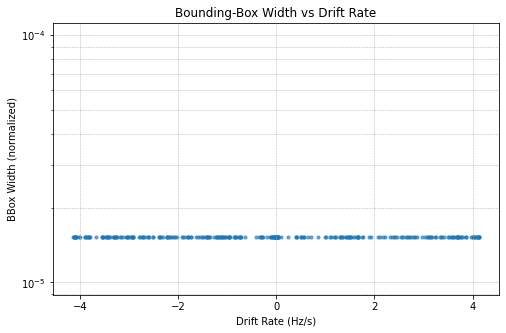

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(drifts, widths, s=10, alpha=0.6)
plt.xlabel('Drift Rate (Hz/s)')
plt.ylabel('BBox Width (normalized)')
plt.title('Bounding-Box Width vs Drift Rate')
plt.yscale('log')       # optional: log-scale if widths span many orders
plt.grid(True, which='both', ls='--', lw=0.5)
out_plot = 'bbox_width_vs_drift.png'
plt.savefig(out_plot, dpi=150, bbox_inches='tight')
plt.show()
